Surrogate Model

In [1]:
import sklearn
from sklearn import feature_selection as fs
 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

load data

In [2]:
######### TCGA discovery features #############
data_all = pd.read_csv('H:/segment_breast/MicroE/new/caf_five_smlp/new/caf_new.csv',index_col=0)

label_caf = np.array(data_all['CAF'])
label_tnbc = np.array(data_all['tnbc'])

data_feature = data_all.drop(['CAF', 'tnbc'], axis=1)
feature_name = data_feature.columns

print(data_feature.shape)
print(label_caf.shape)
print(label_tnbc.shape)

(518, 36)
(518,)
(518,)


In [4]:
##################### Radiogenomics Validation features #####################
data_tcga = pd.read_csv('H:/segment_breast/MicroE/new/val/TCGA/caf/new/val_radiomics_new.csv',index_col=0)

data_tcga1 = data_tcga[data_tcga['tnbc'] != 2]
label_tcga = np.array(data_tcga1['tnbc'])
data_feature_tcga = data_tcga1.drop(['CAF', 'tnbc'], axis=1)
data_feature_tcga.shape

(178, 36)

In [155]:
######################## Radiomics Features (ISPY) #########################
data_ispy = pd.read_csv('H:/segment_breast/MicroE/new/val/ISPY/CAF_0_new/radio_ispy.csv',index_col=0)

label_ispy = np.array(data_ispy['tnbc'])
data_feature_ispy = data_ispy.drop(['tnbc'], axis=1)

data_feature_ispy.shape

(1252, 36)

In [114]:
##################### Radiomics Features (UCSF) #################################

data_ucsf = pd.read_csv('F:/Grad-CAM/UCSF/CAF_0/radio_ucsf.csv',index_col=0)
label_ucsf = np.array(data_ucsf['tnbc'])
data_feature_ucsf = data_ucsf.drop(['tnbc'], axis=1)

print(data_feature_ucsf.shape)
print(label_ucsf.shape)

(445, 36)
(445,)


In [7]:
####################   Clinical   #####################

data_sysucc = pd.read_csv('F:/Grad-CAM/SYSUCC/0/radio_sysucc.csv',index_col=0)

label_sysucc = np.array(data_sysucc['tnbc'])

data_feature_sysucc = data_sysucc.drop(['tnbc'], axis=1)
data_feature_sysucc.shape

(1571, 36)

Model

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB, ComplementNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import NearestNeighbors,KDTree,BallTree
from sklearn.ensemble import GradientBoostingClassifier

from catboost import CatBoostClassifier
import xgboost as xgb

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler



radiogenomics discovery

In [129]:
# radiogenomics discovery cohort 

X_train,X_test,y_train,y_test = train_test_split(data_feature, label_tnbc, test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# oversample
ros = RandomOverSampler(sampling_strategy=1,random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)
print(Counter(y_resampled))

(414, 36) (104, 36) (414,) (104,)


radiogenomics validation

In [133]:
# radiogenomics validation
X_train,X_test,y_train,y_test = train_test_split(data_feature_tcga, label_tcga, test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# oversample
ros = RandomOverSampler(sampling_strategy=1,random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)
print(Counter(y_resampled))

(142, 36) (36, 36) (142,) (36,)


ISPY

In [156]:
# radiomics : ISPY
X_train,X_test,y_train,y_test = train_test_split(data_feature_ispy, label_ispy, test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# oversample
ros = RandomOverSampler(sampling_strategy=1,random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)
print(Counter(y_resampled))

(1001, 36) (251, 36) (1001,) (251,)


UCSF

In [141]:
# radiomics : UCSF
X_train,X_test,y_train,y_test = train_test_split(data_feature_ucsf, label_ucsf, test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# oversample
ros = RandomOverSampler(sampling_strategy=1,random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)
print(Counter(y_resampled))

(356, 36) (89, 36) (356,) (89,)


Clinical data

In [151]:
X_train,X_test,y_train,y_test = train_test_split(data_feature_sysucc, label_sysucc, test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# oversample
ros = RandomOverSampler(sampling_strategy=1,random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)
print(Counter(y_resampled))

(1256, 36) (315, 36) (1256,) (315,)


Train model

In [165]:
# train model
#clf = xgb.XGBClassifier(learning_rate=0.1,scale_pos_weight=3,subsample=0.6,n_estimators=150) 
clf = xgb.XGBClassifier()

clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [166]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
acc_train = accuracy_score(y_pred=y_pred_train, y_true=y_train)

pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_score=pred_prob[:, 1], y_true=y_test)
roc_auc = auc(fpr, tpr)
acc_con1 = confusion_matrix(y_pred=y_pred, y_true=y_test)
acc_pred1 = accuracy_score(y_pred=y_pred, y_true=y_test)

preci_scores = precision_score(y_pred=y_pred, y_true=y_test)
recall_scores = recall_score(y_pred=y_pred, y_true=y_test)
f1_scores = f1_score(y_pred=y_pred, y_true=y_test)


print("Accuracy Train: ", acc_train)
print("Accuracy Test: ", acc_pred1)
print("Confusion Matrix: ")
print(acc_con1) 
print("ROC AUC: ", roc_auc)
print('F1 score: ', f1_scores)
print('Precision: ', preci_scores)
print('Recall: ', recall_scores)

Accuracy Train:  1.0
Accuracy Test:  0.8426966292134831
Confusion Matrix: 
[[14  9]
 [ 5 61]]
ROC AUC:  0.8866930171277998
F1 score:  0.8970588235294118
Precision:  0.8714285714285714
Recall:  0.9242424242424242


Draw AUC

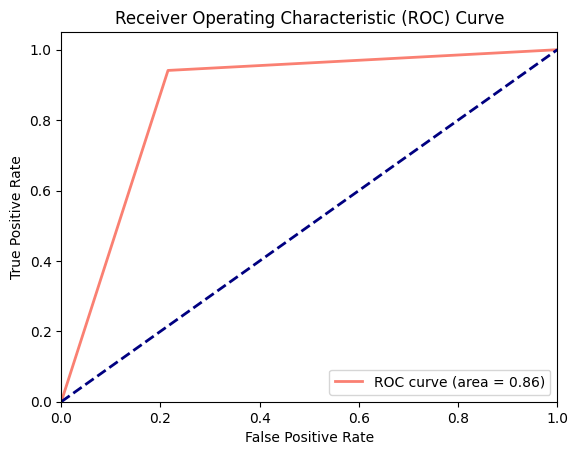

In [109]:
def AUC_draw(y_true, y_pred):
      
    fpr, tpr, thresholds = roc_curve(y_score=pred_prob[:, 1], y_true=y_test)
    roc_auc = auc(fpr, tpr)
     
    plt.figure()  
    plt.plot(fpr, tpr, color='salmon', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
    plt.title('Receiver Operating Characteristic (ROC) Curve')  
    plt.legend(loc="lower right")
    plt.savefig("../Results/AUC/AUC_tcga_train.png",dpi=1200, bbox_inches='tight')  
    #plt.show()
    
AUC_draw(y_test, y_pred)

Heatmap

In [87]:
import seaborn as sns

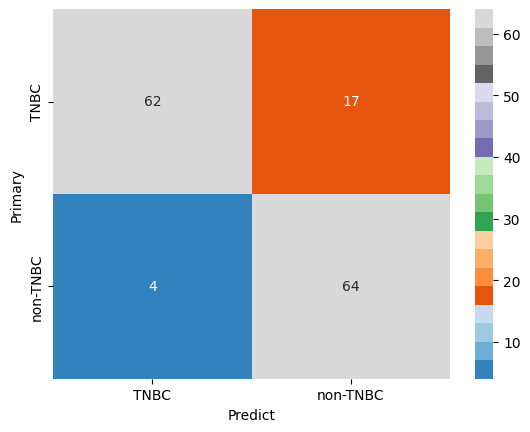

In [110]:

def plot_matrix(y_true, y_pred, xlabels, ylabels):
    cm = confusion_matrix(y_true, y_pred) 
    
    ax = sns.heatmap(cm,annot=True,fmt='g',cmap='tab20c',
                     xticklabels=xlabels,
                     yticklabels=ylabels)
    #xticklabels、yticklabels
    #ax.set_title(title_name) 
    ax.set_xlabel('Predict') 
    ax.set_ylabel('Primary')
    plt.savefig("../Results/AUC/AUC_tcga_train.png", dpi=1200, bbox_inches='tight')

x_labels = ['TNBC','non-TNBC']
y_labels = ['TNBC','non-TNBC']
plot_matrix(y_test, y_pred, x_labels, y_labels)

important feature

In [45]:
from xgboost import plot_importance

[0.02135352 0.02488618 0.028046   0.02929236 0.02821175 0.02112901
 0.03406819 0.02963937 0.03095474 0.02677844 0.0224914  0.03071383
 0.03928123 0.02494863 0.028277   0.02883833 0.03835407 0.03362407
 0.02792839 0.02523176 0.02582015 0.025774   0.02716403 0.02950753
 0.02561637 0.03350103 0.03051698 0.02717511 0.02102206 0.02816894
 0.02879362 0.01750578 0.02577752 0.02881666 0.02451101 0.026281  ]


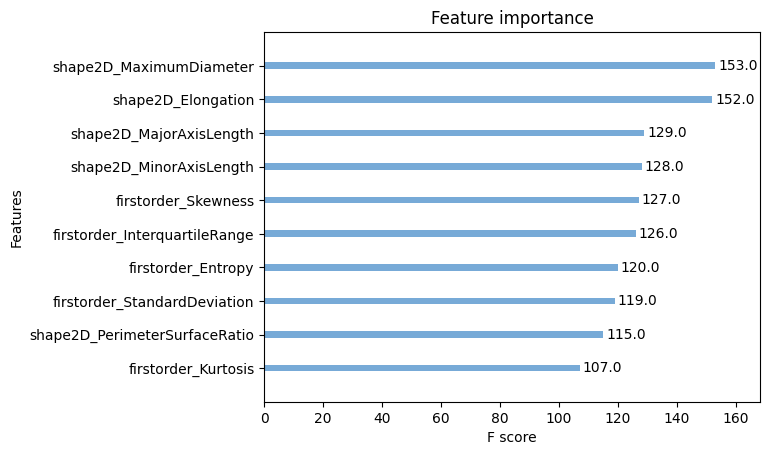

In [49]:
############# Feature Importance #############
# feature importance
print(clf.feature_importances_)

# plot feature importance
plot_importance(clf, max_num_features=10, grid=False,color="#77AAD7")

plt.savefig('../Results/feature_importance_sysucc.png', dpi=1200, bbox_inches="tight", pad_inches=0)
plt.show()

Save Model

In [15]:
import pickle

In [27]:
with open('D:/1.June/singlecell/Bayes_CNN/supple/XGB/xgb_model_ucsf.pkl', 'wb') as f:
    pickle.dump(clf, f)

Tree

In [17]:
from matplotlib import pyplot
from xgboost import plot_tree

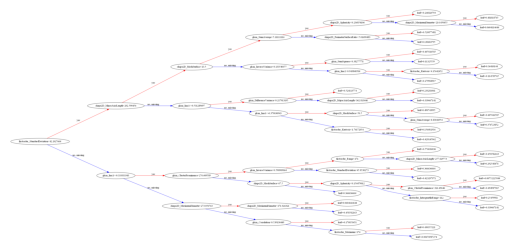

In [18]:
plot_tree(clf, num_trees=0, rankdir='LR')
pyplot.show()

In [11]:
import pydotplus 
from PIL import Image, ImageDraw, ImageFont

In [65]:
tree_data = xgb.to_graphviz(clf, num_trees=0)
plt.show(tree_data)